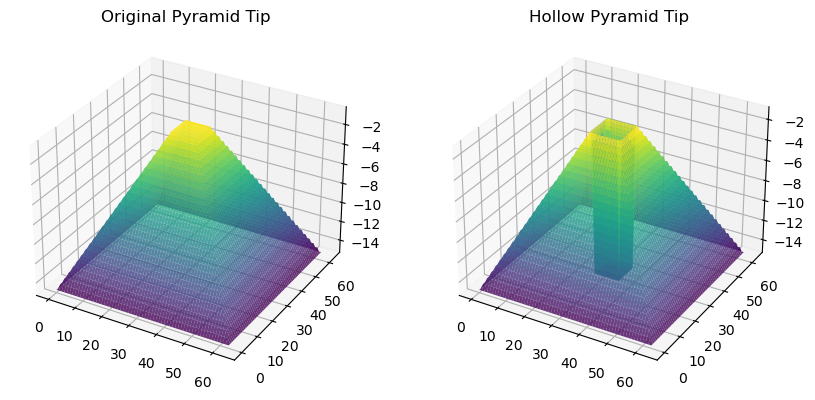

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assume you have already defined generate_filled_tip function
def generate_filled_tip(size, size_top, height):
    tip = np.zeros((size, size), dtype=float)
    x = tip.shape[0]
    y = tip.shape[1]

    for i in range(x // 2 - size_top // 2):
        for j in range(i, x - i):
            for h in range(i, x - i):
                tip[j, h] = i / (x // 2 - size_top // 2) * height
    tip = tip - height

    return tip

def generate_hollow_tip(size, size_top, height):
    tip = generate_filled_tip(64, 8, 15)
    tip_max = np.max(tip)
    tip[tip == tip_max] = (-height)
    return tip

# Generate pyramid tip and hollow tip
pyramid_tip = generate_filled_tip(64, 8, 15)
pyramid_tip_hollow = generate_hollow_tip(64, 8, 15)

# Create a meshgrid
x, y = np.meshgrid(np.arange(pyramid_tip.shape[0]), np.arange(pyramid_tip.shape[1]))

# Plot the original and hollow pyramid tips in 3D
fig = plt.figure(figsize=(10, 5))

# Original Pyramid Tip
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(x, y, pyramid_tip, cmap='viridis', rstride=1, cstride=1, alpha=0.8, antialiased=True)
ax.set_title('Original Pyramid Tip')

# Hollow Pyramid Tip
ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(x, y, pyramid_tip_hollow, cmap='viridis', rstride=1, cstride=1, alpha=0.8, antialiased=True)
ax.set_title('Hollow Pyramid Tip')

plt.show()


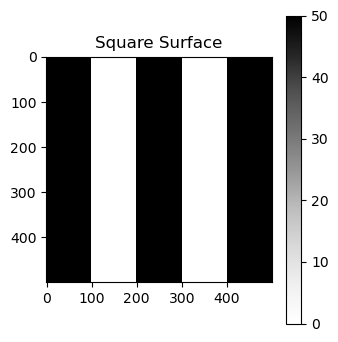

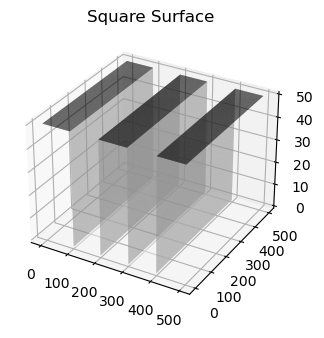

In [20]:
def generate_periodic_square_surface(size, feature_size, height, T):
    surface = np.zeros((size, size), dtype=float)

    for i in range(0, size, T):
        for j in range(0, size, T):
            surface[:,j:j+feature_size] = height

    return surface

# Example: Generate a surface with periodic square features
size = 500
feature_size = 100
periodicity = 200
height = 50

periodic_square_surface = generate_periodic_square_surface(size, feature_size, height, periodicity)

# Plot the 2D array as a heatmap
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(periodic_square_surface, cmap='Greys', interpolation='nearest')
plt.colorbar()
plt.title('Square Surface')

# Plot the surface in 3D
x, y = np.meshgrid(np.arange(size), np.arange(size))
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(x, y, periodic_square_surface, cmap='Greys', rstride=1, cstride=1, alpha=0.8, antialiased=True)
ax.set_title('Square Surface')

plt.show()

In [21]:
import numpy as np

def idilation(surface, tip):
    surf_xsiz, surf_ysiz = surface.shape
    tip_xsiz, tip_ysiz = tip.shape
    xc = int(tip_xsiz/2)
    yc = int(tip_ysiz/2)

    r = np.zeros_like(surface, dtype=surface.dtype)

    for i in range(surf_xsiz):
        for j in range(surf_ysiz):
            pxmin = max(-i, -xc)
            pymin = max(-j, -yc)
            pxmax = min(surf_xsiz - i, -xc + tip_xsiz -1)
            pymax = min(surf_ysiz - j, -yc + tip_ysiz -1)
            dil_max = surface[i + pxmin, j + pymin] + tip[xc + pxmin, yc + pymin]

            for px in range(pxmin, pxmax):
                for py in range(pymin, pymax):
                    temp = surface[i + px, j + py] + tip[xc + px, yc + py]
                    dil_max = max(temp, dil_max)

            r[i, j] = dil_max

    return r


Text(0.5, 1.0, 'Hollow Pyramid Tip')

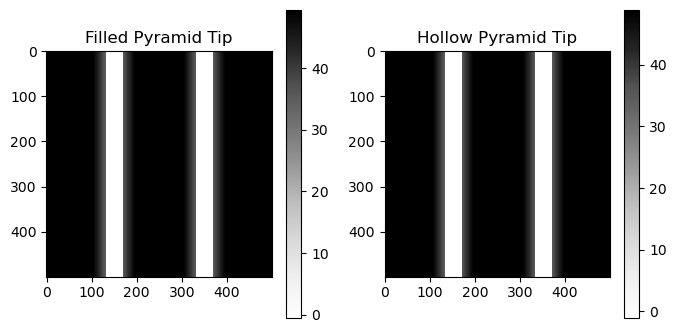

In [22]:
r = idilation(periodic_square_surface, pyramid_tip)
r_hollow = idilation(periodic_square_surface, pyramid_tip_hollow)
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(r, cmap='Greys', interpolation='nearest')
plt.colorbar()
plt.title('Filled Pyramid Tip')
plt.subplot(1, 2, 2)
plt.imshow(r_hollow, cmap='Greys', interpolation='nearest')
plt.colorbar()
plt.title('Hollow Pyramid Tip')

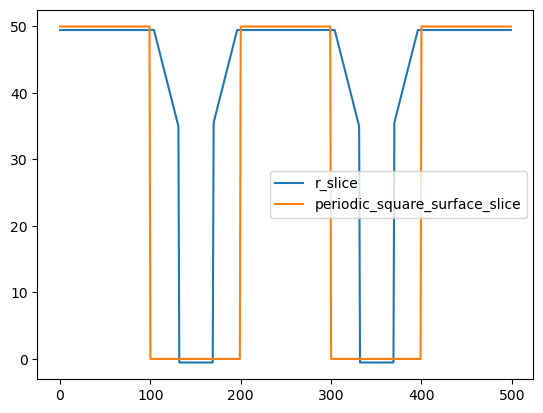

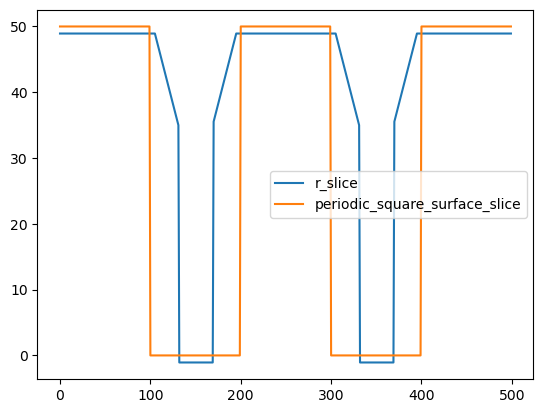

In [24]:
r_slice = r[100,:]
periodic_square_surface_slice = periodic_square_surface[100,:]
x1 = range(len(r_slice))
plt.plot(x1, r_slice, label='r_slice')
plt.plot(x1, periodic_square_surface_slice, label='periodic_square_surface_slice')
plt.legend()
plt.show()

r_hollow_slice = r_hollow[100,:]
periodic_square_surface_slice = periodic_square_surface[100,:]
x2 = range(len(r_hollow_slice))
plt.plot(x2, r_hollow_slice, label='r_slice')
plt.plot(x2, periodic_square_surface_slice, label='periodic_square_surface_slice')
plt.legend()
plt.show()


In [29]:
import numpy as np

def ierosion(image, tip):
    im_xsiz, im_ysiz = image.shape
    tip_xsiz, tip_ysiz = tip.shape
    xc = int(tip_xsiz/2)
    yc = int(tip_ysiz/2)
    r = np.zeros_like(image, dtype=image.dtype)

    for i in range(im_xsiz):
        for j in range(im_ysiz):
            pxmin = max(-i, -xc)
            pymin = max(-j, -yc)
            pxmax = min(im_xsiz - i, -xc + tip_xsiz - 1)
            pymax = min(im_ysiz - j, -yc + tip_ysiz - 1)
            eros_min = image[i + pxmin, j + pymin] - tip[xc + pxmin, yc + pymin]

            for px in range(pxmin, pxmax):
                for py in range(pymin, pymax):
                    temp = image[i + px, j + py] - tip[xc + px, yc + py]
                    eros_min = min(temp, eros_min)

            r[i, j] = eros_min

    return r

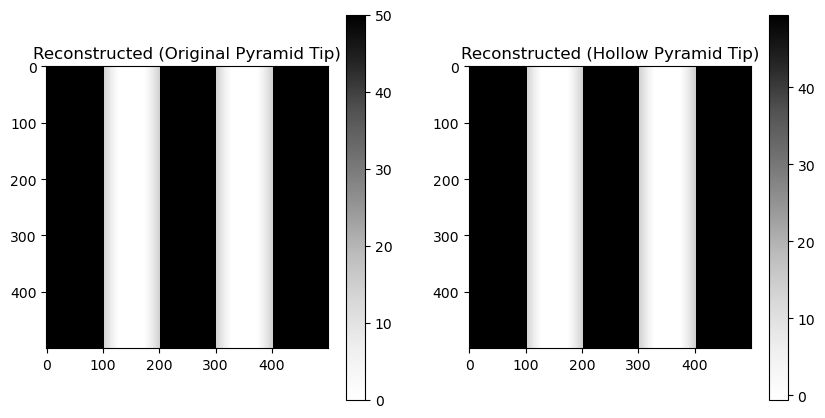

In [30]:
reconstructed_surface = ierosion(r, pyramid_tip)
reconstructed_surface_hollow = ierosion(r_hollow, pyramid_tip)

# Plot the pyramid_tip_filled
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(reconstructed_surface, cmap='Greys', interpolation='nearest')
plt.colorbar()
plt.title('Reconstructed (Original Pyramid Tip)')

# Plot the pyramid_tip_hollow
plt.subplot(1, 2, 2)
plt.imshow(reconstructed_surface_hollow, cmap='Greys', interpolation='nearest')
plt.colorbar()
plt.title('Reconstructed (Hollow Pyramid Tip)')

plt.show()


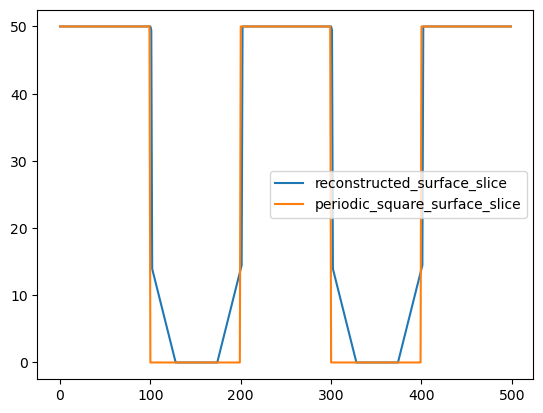

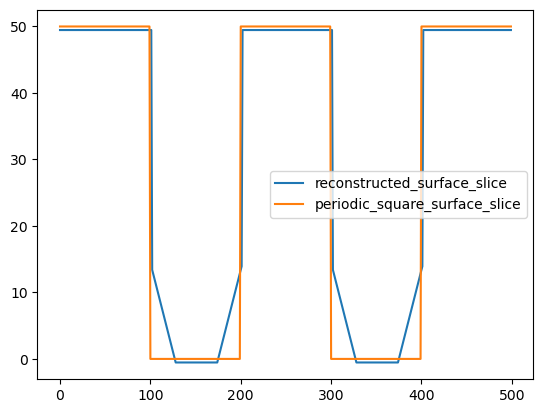

In [31]:
reconstructed_surface_slice = reconstructed_surface[200,:]
periodic_square_surface_slice = periodic_square_surface[200,:]
x = range(len(reconstructed_surface_slice))
plt.plot(x, reconstructed_surface_slice, label='reconstructed_surface_slice')
plt.plot(x, periodic_square_surface_slice, label='periodic_square_surface_slice')
plt.legend()
plt.show()
reconstructed_surface_hollow_slice = reconstructed_surface_hollow[200,:]
periodic_square_surface_slice = periodic_square_surface[200,:]
x = range(len(reconstructed_surface_hollow_slice))
plt.plot(x, reconstructed_surface_hollow_slice, label='reconstructed_surface_slice')
plt.plot(x, periodic_square_surface_slice, label='periodic_square_surface_slice')
plt.legend()
plt.show()